## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings("ignore")
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

## Encoding the Target

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) # 0 - present, 1 - not present

OneHotEncoder()

In [3]:
# With

data = [] # storing images in numpy array format
paths = [] # paths for individual images
result = [] # answers

for r, d, f in os.walk(r'./yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
# Without

paths = []
for r, d, f in os.walk(r"./no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(140, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## Model Building

In [24]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(layers.Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(layers.Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = "categorical_crossentropy", optimizer=optimizer, metrics=['acc'])
print(model.summary())

2021-12-11 18:42:52.851145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-11 18:42:52.900205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-11 18:42:52.900530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-11 18:42:52.901526: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [25]:
y_train.shape

(112, 1, 2)

In [26]:
y_train

array([[[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       [[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],

       [[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[1., 0.]],

       [[1., 0.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       [[0., 1.]],

       [[1., 0.]],

       [[1., 0.]],

       [[1., 0.]],

       [[0., 1.]],

       [[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],

       [[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],



In [10]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 50,validation_data = (x_test, y_test))

2021-12-11 10:56:04.494541: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-12-11 10:56:05.411894: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-12-11 10:56:05.817554: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-12-11 10:56:06.573829: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-12-11 10:56:06.573892: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.31GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-12-11 10:56:07.665411: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.3

3/3 [==============================] - 5s 734ms/step - loss: 5.6048 - acc: 0.5225 - val_loss: 11.8225 - val_acc: 0.6429
Epoch 2/100
3/3 [==============================] - 0s 88ms/step - loss: 5.6277 - acc: 0.6847 - val_loss: 2.3256 - val_acc: 0.7857
Epoch 3/100
3/3 [==============================] - 0s 88ms/step - loss: 1.5192 - acc: 0.7658 - val_loss: 10.4219 - val_acc: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 88ms/step - loss: 2.4735 - acc: 0.6577 - val_loss: 1.5831 - val_acc: 0.7143
Epoch 5/100
3/3 [==============================] - 0s 88ms/step - loss: 1.0029 - acc: 0.8108 - val_loss: 1.3425 - val_acc: 0.8214
Epoch 6/100
3/3 [==============================] - 0s 99ms/step - loss: 0.9157 - acc: 0.8288 - val_loss: 1.0267 - val_acc: 0.8929
Epoch 7/100
3/3 [==============================] - 0s 97ms/step - loss: 0.2741 - acc: 0.9189 - val_loss: 1.8343 - val_acc: 0.7500
Epoch 8/100
3/3 [==============================] - 0s 100ms/step - loss: 0.7627 - acc: 0.8739 - val

# Plotting Losses

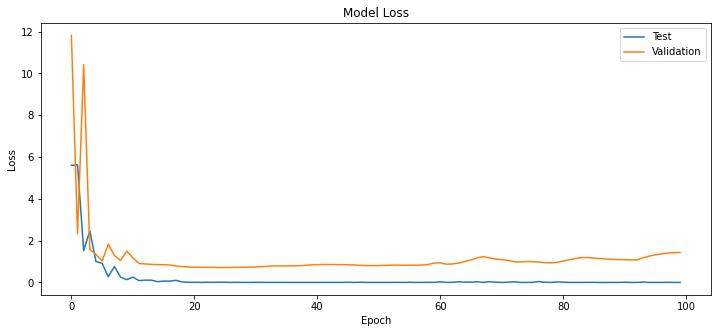

In [11]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

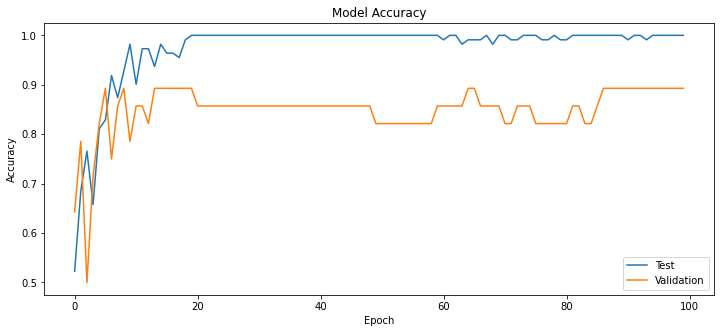

In [12]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [13]:
model.save('./FinalModel.h5')